## Lending Club Case Study Assignment
### ------------------------------------------------------------------------------------------------------------------------
#### Analysis for identifying the Patterns and Insights for Loan defaulters.

In [197]:
# Import Libraries
import pandas as pd
import numpy as np
# Import Plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [198]:
# Load the CSV file for analysis
masterdf = pd.read_csv("loan.csv", skipinitialspace=True)
masterdf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [199]:
# Check the no of rows/columns
masterdf.shape

(39717, 111)

In [200]:
# Check the columns datatypes
masterdf.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

#### Data Cleaning and validation.

##### Cleanup Null values and Unique Values 

In [201]:
# Check the null values per Column in percentage so we can see to drop few columns having more null values.
clean_null = round(100*(masterdf.isnull().sum()/len(masterdf.index)), 2)
# Sort in descending order
clean_null.sort_values(ascending = False)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [202]:
# Drop Null Values columns having  > 90% null values in them.
masterdf.drop(clean_null[ clean_null > 90 ].index, axis=1, inplace=True)

In [203]:
# Check for the null values % after dropping columns > 90% of null values
clean_null = round(100*(masterdf.isnull().sum()/len(masterdf.index)), 2)
# Sort them in descending order
clean_null.sort_values(ascending = False)

mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_acc                      0.00
total_pymnt_inv                0.00
recoveries                     0.00
total_rec_prncp                0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
pub_rec                        0.00
collection_recovery_fee        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq              

In [204]:
# Check for the reduced no of columns
masterdf.shape

(39717, 55)

In [205]:
# Look for Unique values in the columns. For example a column containing all zero values is of no use for analysis.
masterdf.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                    101
last_credit_pull_d          

In [206]:
# Dropping Columns with one Unique values. No use for analysis.
masterdf.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type',
 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [207]:
# Check for size to confirm on the columns dropped. 
masterdf.shape

(39717, 46)

In [208]:
# Finding number of unique values, printing high unique valued columns
masterdf.nunique().sort_values(ascending=False).head(12)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
desc               26527
revol_bal          21711
title              19615
installment        15383
dtype: int64

In [209]:
# Some of the columns not needed for analysis after looking at the data in them.
masterdf.drop(['emp_title', 'title','member_id', 'url', 'total_rec_int', 'total_rec_prncp', 'total_rec_late_fee',
'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'out_prncp', 'out_prncp_inv','mths_since_last_delinq'], axis=1, inplace=True)

In [210]:
# Check for the null values % after dropping columns > 90% of null values
clean_null = round(100*(masterdf.isnull().sum()/len(masterdf.index)), 2)
# Sort them in descending order
clean_null.sort_values(ascending = False)

desc                    32.58
emp_length               2.71
pub_rec_bankruptcies     1.75
revol_util               0.13
dti                      0.00
delinq_2yrs              0.00
earliest_cr_line         0.00
inq_last_6mths           0.00
open_acc                 0.00
pub_rec                  0.00
zip_code                 0.00
revol_bal                0.00
total_acc                0.00
total_pymnt              0.00
total_pymnt_inv          0.00
last_pymnt_amnt          0.00
addr_state               0.00
id                       0.00
loan_amnt                0.00
loan_status              0.00
issue_d                  0.00
verification_status      0.00
annual_inc               0.00
home_ownership           0.00
sub_grade                0.00
grade                    0.00
installment              0.00
int_rate                 0.00
term                     0.00
funded_amnt_inv          0.00
funded_amnt              0.00
purpose                  0.00
dtype: float64

In [211]:
# Check for size to confirm on the columns dropped. 
masterdf.shape

(39717, 32)

In [212]:
# Drop the null rows in these columns to futher clean the data 
masterdf.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)
# After looking at the data this column is not needed.
masterdf.drop(['desc'], axis=1, inplace=True)

In [213]:
# Check for the null values % after dropping columns > 90% of null values
clean_null = round(100*(masterdf.isnull().sum()/len(masterdf.index)), 2)
# Sort them in descending order
clean_null.sort_values(ascending = False)

id                      0.0
zip_code                0.0
last_pymnt_amnt         0.0
total_pymnt_inv         0.0
total_pymnt             0.0
total_acc               0.0
revol_util              0.0
revol_bal               0.0
pub_rec                 0.0
open_acc                0.0
inq_last_6mths          0.0
earliest_cr_line        0.0
delinq_2yrs             0.0
dti                     0.0
addr_state              0.0
purpose                 0.0
loan_amnt               0.0
loan_status             0.0
issue_d                 0.0
verification_status     0.0
annual_inc              0.0
home_ownership          0.0
emp_length              0.0
sub_grade               0.0
grade                   0.0
installment             0.0
int_rate                0.0
term                    0.0
funded_amnt_inv         0.0
funded_amnt             0.0
pub_rec_bankruptcies    0.0
dtype: float64

#### All Null / Unique Values got cleaned up.

In [214]:
# Check for size to confirm on the columns dropped. 
masterdf.shape

(37898, 31)

##### Generic Data Formatting - Cleanup unwanted spaces / symbols in the column values 

In [215]:
# Checking for unique values for term column
masterdf.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [216]:
# Stripping empty space in values in term
masterdf['term'] = masterdf.term.str.strip()
masterdf.term.unique()

array(['36 months', '60 months'], dtype=object)

In [217]:
# Removing current loan status rows since we are going to analyse the Loan status with Payed and Charged off. we might not get much insight from the Current loan status
masterdf = masterdf[masterdf.loan_status != 'Current']

In [218]:
# Check for size to confirm on the columns dropped. 
masterdf.shape

(36800, 31)

In [219]:
# stripping unwanted '%' value
masterdf['int_rate'] = masterdf.int_rate.str.strip('%').astype(float)
masterdf['revol_util'] = masterdf.revol_util.str.strip('%').astype(float)

In [220]:
# Converting to date type
masterdf['issue_d'] = pd.to_datetime(masterdf.issue_d, format='%b-%y')

# Calculate the correct centuary year if date is more than 2022 ---- example Dec-1998
masterdf['issue_d'] = masterdf['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2022 else x)

In [221]:
# See data types for any conversion
masterdf.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line                object
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util               

In [222]:
# See data types for any conversion
masterdf.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line                object
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util               

In [223]:
# Date Conversion to derived columns 
masterdf['issue_d_year'] = masterdf.issue_d.dt.year
masterdf['issue_d_month'] = masterdf.issue_d.dt.strftime('%b')
masterdf['issue_d_weekday'] = masterdf.issue_d.dt.weekday

# Data type coversion
masterdf['issue_d_year'] = masterdf['issue_d_year'].astype(object)
masterdf['issue_d_weekday'] = masterdf['issue_d_weekday'].astype(object)

##### All Data cleaned up and validated - Next is Analysis using plots

#### Layout Plots for using EDA Methods to Analysis Single columns for data distribution &  2 different columns for correlation &  3 different columns for correlation.
##### These Methods are Univariate/Segmented Univariate/ Bivariate analysis

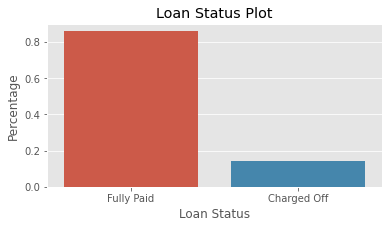

In [224]:
plt.style.use("ggplot")
plt.figure(figsize=(6,3))

# Percentage for Y axis
percent_df = masterdf['loan_status'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='loan_status', data=percent_df)
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.title('Loan Status Plot')
plt.show()

##### Insight -  Most of the Loan is Fully Paid in Lending club

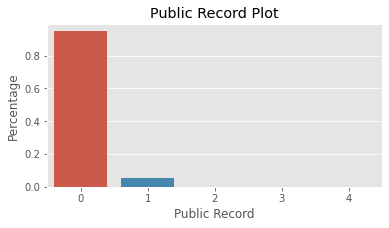

In [225]:
plt.figure(figsize=(6,3))

### Percentage for Y axis
percent_df = masterdf['pub_rec'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='pub_rec', data=percent_df)
plt.xlabel('Public Record')
plt.ylabel('Percentage')
plt.title('Public Record Plot')
plt.show()

##### Insight -  Borrowers have less percentage of Public records 

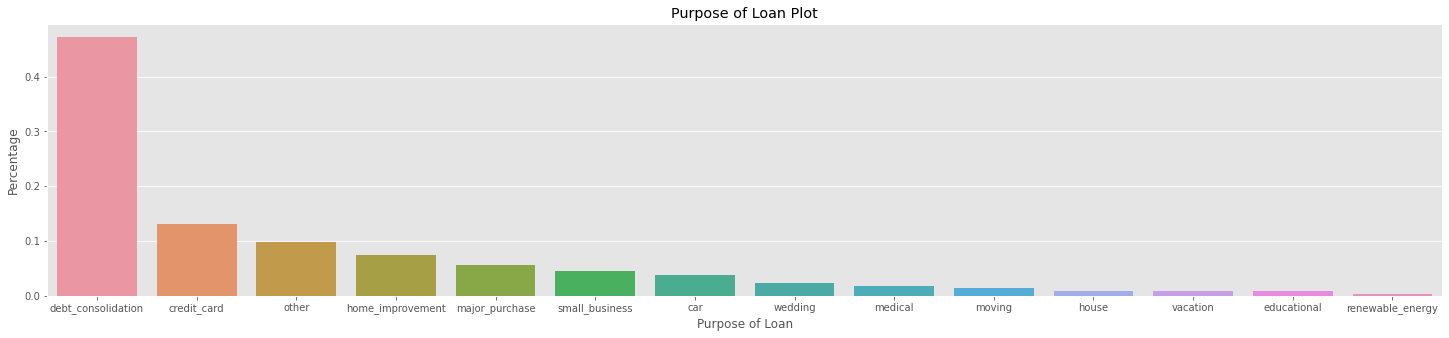

In [226]:
plt.figure(figsize=(25,5))

### Percentage for Y axis
percent_df = masterdf['purpose'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='purpose', data=percent_df)
plt.xlabel('Purpose of Loan')
plt.ylabel('Percentage')
plt.title('Purpose of Loan Plot')
plt.show()

##### Insight -  Borrowers mostly got the loan for debt consolidation

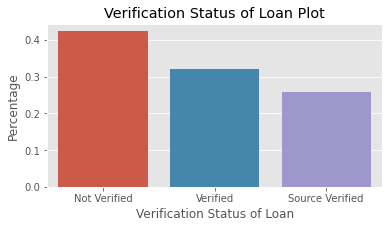

In [227]:
plt.figure(figsize=(6,3))

### Percentage for Y axis
percent_df = masterdf['verification_status'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='verification_status', data=percent_df)
plt.xlabel('Verification Status of Loan')
plt.ylabel('Percentage')
plt.title('Verification Status of Loan Plot')
plt.show()

##### Insight -  Most of the Loan is not verified, this is abnormal.

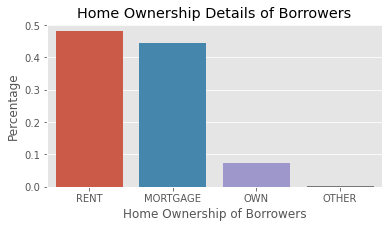

In [228]:
plt.figure(figsize=(6,3))

### Percentage for Y axis
percent_df = masterdf['home_ownership'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='home_ownership', data=percent_df)
plt.xlabel('Home Ownership of Borrowers')
plt.ylabel('Percentage')
plt.title('Home Ownership Details of Borrowers')
plt.show()

##### Insight -  Most of the borrowers have Rental and Mortage home ownership, very few with own houses got loans

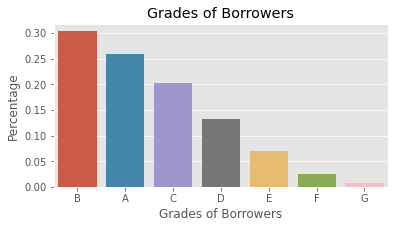

In [229]:
plt.figure(figsize=(6,3))

### Percentage for Y axis
percent_df = masterdf['grade'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='grade', data=percent_df)
plt.xlabel('Grades of Borrowers')
plt.ylabel('Percentage')
plt.title('Grades of Borrowers')
plt.show()

##### Insight -  Most of the borrowers are in better Loan grades.

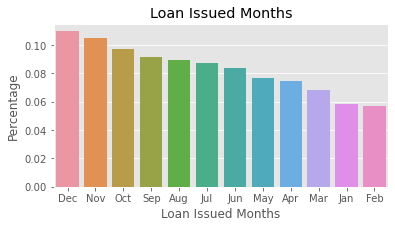

In [230]:

plt.figure(figsize=(6,3))

### Percentage for Y axis
percent_df = masterdf['issue_d_month'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='issue_d_month', data=percent_df)
plt.xlabel('Loan Issued Months')
plt.ylabel('Percentage')
plt.title('Loan Issued Months')
plt.show()

##### Insight - The Loan distribution have linear Increment thruout the year. 

In [231]:
# Loan Amount Percentile calc
masterdf.loan_amnt.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.9])

count    36800.000000
mean     11149.540761
std       7369.855703
min        500.000000
10%       3200.000000
20%       5000.000000
30%       6000.000000
40%       8000.000000
50%      10000.000000
60%      11500.000000
70%      14000.000000
90%      22000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

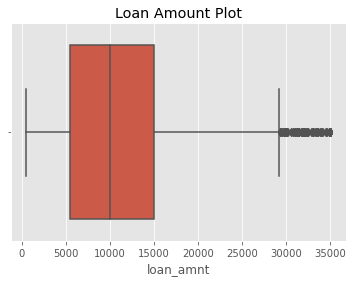

In [232]:
sns.boxplot(masterdf.loan_amnt)
plt.title('Loan Amount Plot')
plt.show()

##### Insight -  Average loan amount is $10K and the max loan issued is around $27K.

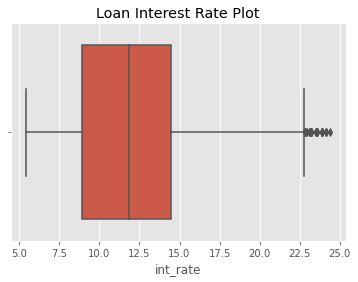

In [233]:
sns.boxplot(masterdf.int_rate)
plt.title('Loan Interest Rate Plot')
plt.show()

##### Insight -  Average Loan Interest Rate is around 11.5 to 12 % 

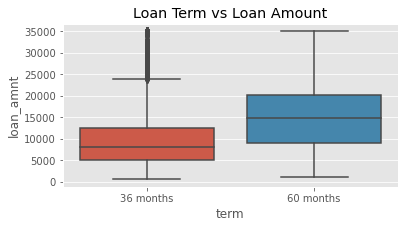

In [234]:
plt.figure(figsize=(6,3))

sns.boxplot(x='term', y=masterdf.loan_amnt, data=masterdf)
plt.title('Loan Term vs Loan Amount')
plt.show()


##### Insight -  Loan term of 60 Months have average loan amount of $15K.

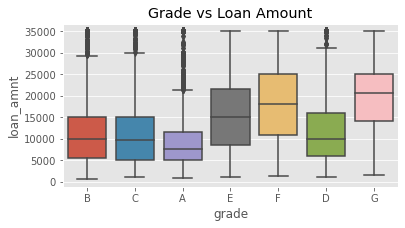

In [235]:
plt.figure(figsize=(6,3))

sns.boxplot(x='grade', y=masterdf.loan_amnt, data=masterdf)
plt.title('Grade vs Loan Amount')
plt.show()



##### Insight -  Lowest Grade G, E, F has more Loan amount issued, this is more risk since low grade loan have borrowers with low credit history and low repayment capacity

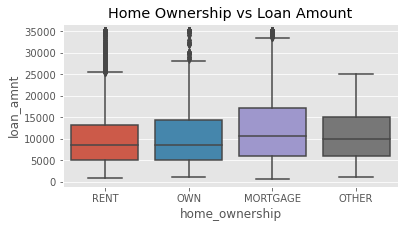

In [236]:
plt.figure(figsize=(6,3))

sns.boxplot(x='home_ownership', y=masterdf.loan_amnt, data=masterdf)
plt.title('Home Ownership vs Loan Amount')
plt.show()

##### Insight - Most of the Borrowers are Mortage Holders.

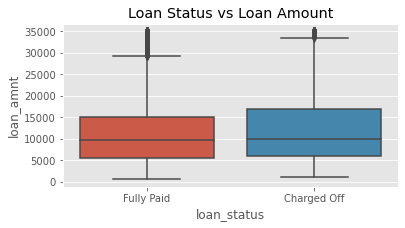

In [237]:
plt.figure(figsize=(6,3))
sns.boxplot(x='loan_status', y=masterdf.loan_amnt, data=masterdf)
plt.title('Loan Status vs Loan Amount')
plt.show()

##### Insight -  Higher amount of loans issued have high chance of getting defaulted.

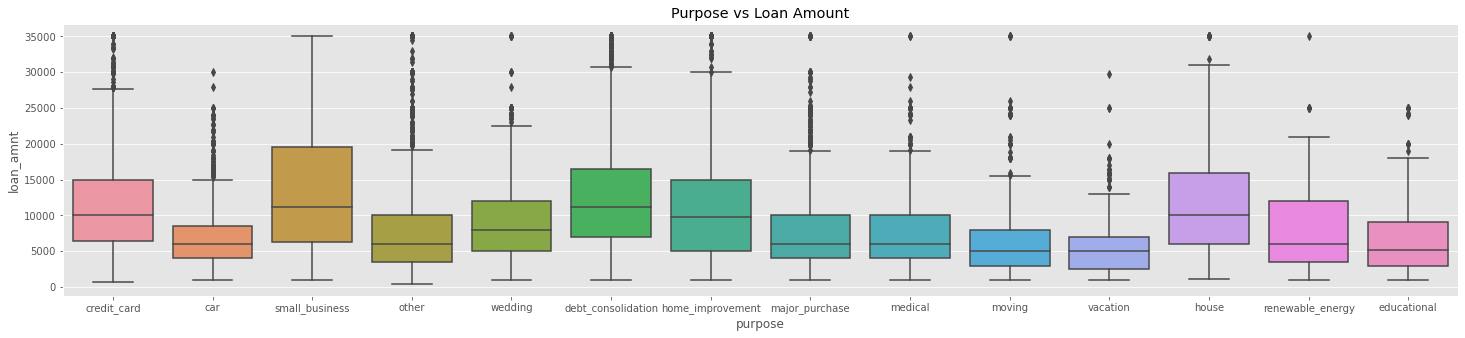

In [238]:
plt.figure(figsize=(25,5))
sns.boxplot(x='purpose', y=masterdf.loan_amnt, data=masterdf)
plt.title('Purpose vs Loan Amount')
plt.show()

##### Insight -  Small Business loan purpose is having high loan amount issued

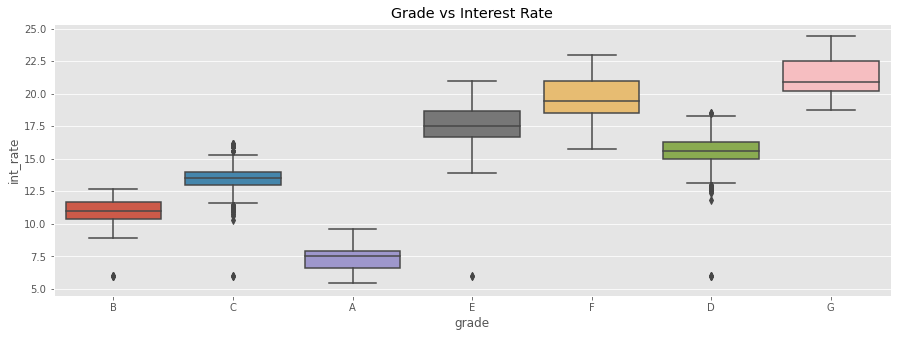

In [239]:
plt.figure(figsize=(15,5))
sns.boxplot(x='grade', y=masterdf.int_rate, data=masterdf)
plt.title('Grade vs Interest Rate')
plt.show()

##### Insight -  Lesser Loan grades have higher interest rate.

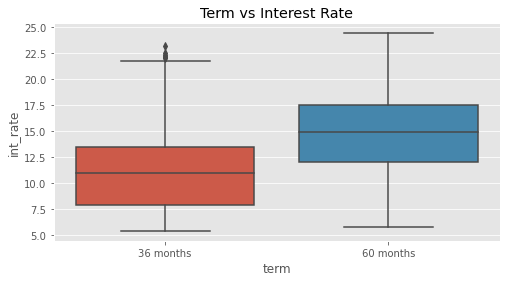

In [240]:
plt.figure(figsize=(8,4))
sns.boxplot(x='term', y=masterdf.int_rate, data=masterdf)
plt.title('Term vs Interest Rate')
plt.show()

##### Insight -  Term with 60 Months is having higher Interest rate

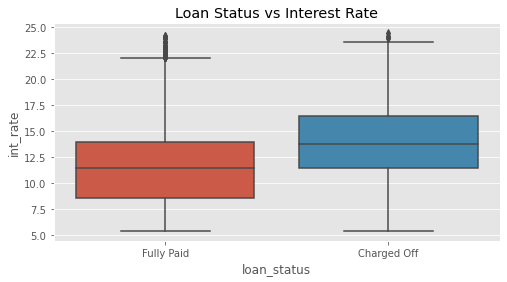

In [241]:
plt.figure(figsize=(8,4))
sns.boxplot(x='loan_status', y=masterdf.int_rate, data=masterdf)
plt.title('Loan Status vs Interest Rate')
plt.show()

##### Insight -  Most of the borrowers defaulted at higher Intertest Rate

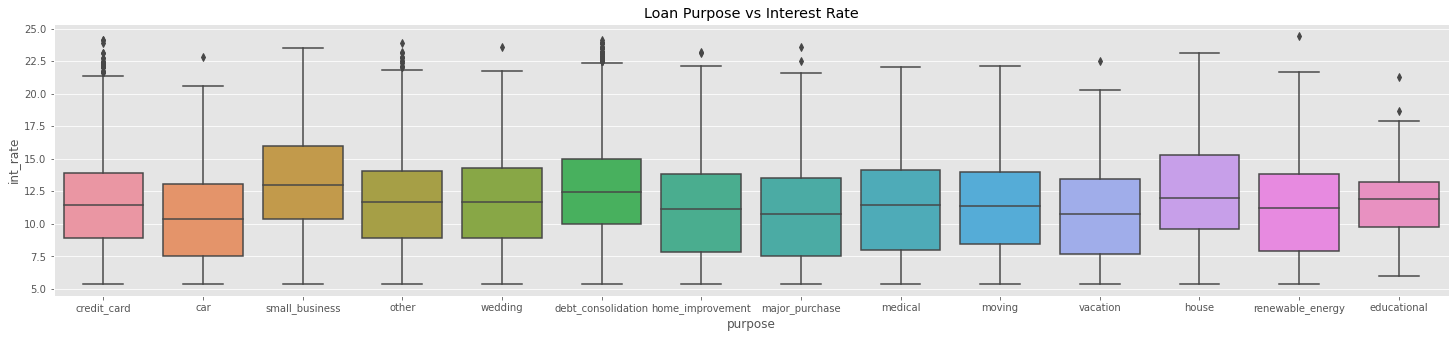

In [242]:
plt.figure(figsize=(25,5))
sns.boxplot(x='purpose', y=masterdf.int_rate, data=masterdf)
plt.title('Loan Purpose vs Interest Rate')
plt.show()

##### Insight -  Most of the borrowers with loans for Small Business have high Interest rates

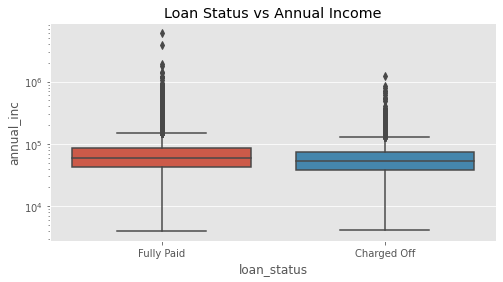

In [243]:
plt.figure(figsize=(8,4))
sns.boxplot(x='loan_status', y=masterdf.annual_inc, data=masterdf)
plt.title('Loan Status vs Annual Income')
plt.yscale('log')
plt.show()

##### Insight -  Annual Income has no much effect on the Fully Paid and defaulted borrowers. This looks abnormal.

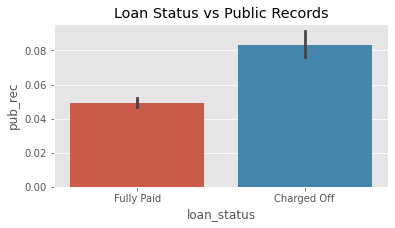

In [244]:
plt.figure(figsize=(6,3))
sns.barplot(data=masterdf, x="loan_status", y="pub_rec")
plt.title('Loan Status vs Public Records')
plt.show()

##### Insight -  Most of the borrowers defaulted having public records, this is more correlated with defaulters.

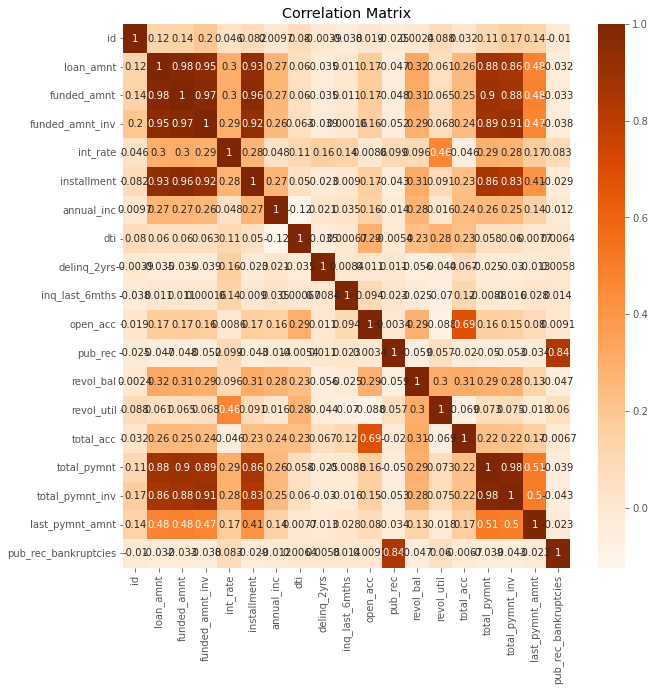

In [245]:
###  ("Correlation Matrix")
corr_matrix = masterdf.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr_matrix, annot = True, cmap='Oranges')
plt.title("Correlation Matrix")
plt.show()

##### Insight -  Few useful Insights from Correlation Matrix Heat Maps 
##### Public Records is highly correlated with Bankruptices
##### Credit card Utilization(revol_utl) is highly correlated with Interest rate

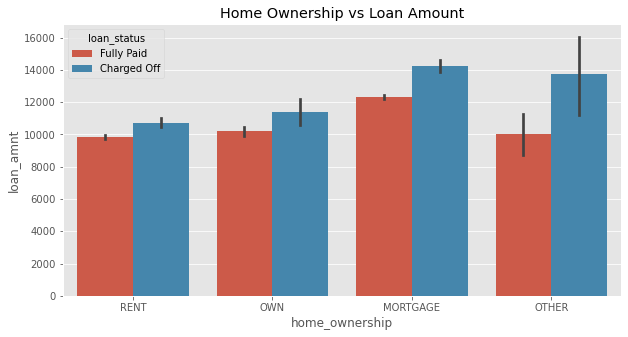

In [246]:
plt.figure(figsize=(10,5))
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data= masterdf)
plt.title('Home Ownership vs Loan Amount')
plt.show()

##### Insight -  Most Mortage holders have high Loan amount issued and most likely defaulted.

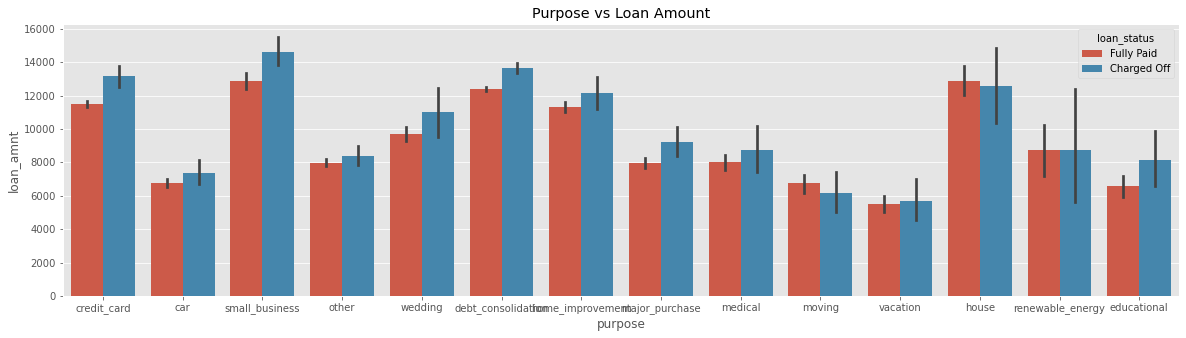

In [247]:
plt.figure(figsize=(20,5))
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= masterdf)
plt.title('Purpose vs Loan Amount')
plt.show()

##### Insight -  Most of the borrowers with loans issued for Small Business purpose have high loan amounts and most likely defaulted.

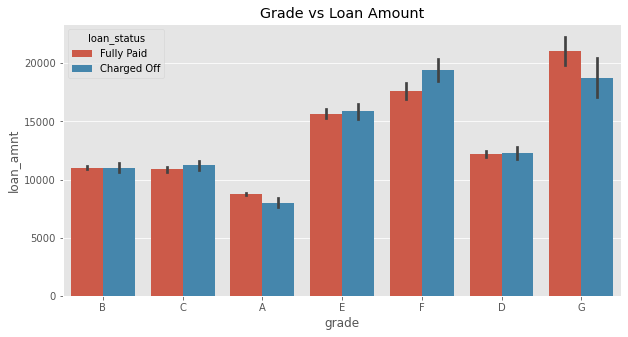

In [248]:
plt.figure(figsize=(10,5))
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data= masterdf)
plt.title('Grade vs Loan Amount')
plt.show()

##### Insight -  Most of the borrowers with less loan grades have high loan amount issued and most likely defaulted.

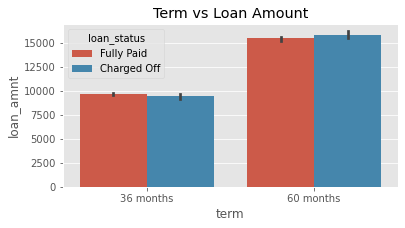

In [249]:
plt.figure(figsize=(6,3))
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data= masterdf)
plt.title('Term vs Loan Amount')
plt.show()

##### Insight -  Most of the borrowers with 60 months term have high loan amount issued and most likely defaulted.

### ------------------------------------------------------------------------------------------------------------------------
### END OF ANALYSIS
### ------------------------------------------------------------------------------------------------------------------------